## GARCH Model for Volatility Forecasting

Volatility measures the extent of variation in the returns of a security or market index and is often used to assess risk. Higher volatility implies greater risk, while lower volatility suggests less risk. GARCH models are extensively used in finance because they effectively capture the changing nature of volatility over time. In this tutorial, we will develop an application using real financial data.

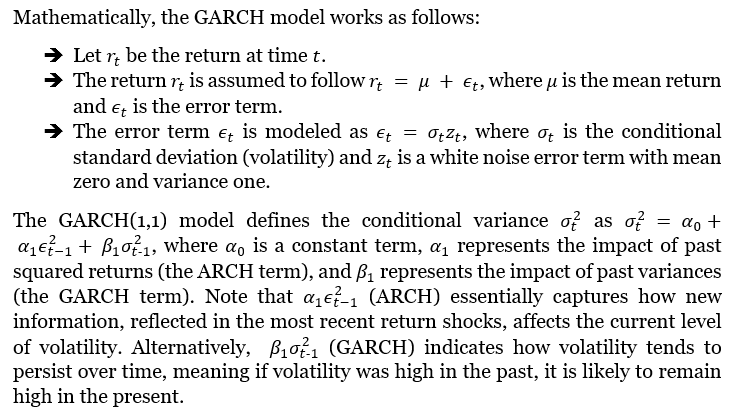

In [ ]:
# This code was modified based on a previous contribution from Abdelkarim Abdallah

!pip install mplfinance
!pip install arch

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from arch import arch_model
import plotly.graph_objects as go

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 12.1 MB/s eta 0:00:00


In [ ]:
# Let's choose some companies: Tesla, Nvidia and Apple
tickers = ['TSLA', 'NVDA', 'AAPL']
start_date = '2020-01-01'
end_date = '2024-06-30'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.head()

[*********************100%%**********************]  3 of 3 completed


Ticker,AAPL,NVDA,TSLA
Date,,,
2020-01-02,72.960464,5.973633,28.684000
2020-01-03,72.251137,5.878020,29.534000
2020-01-06,72.826874,5.902671,30.102667
2020-01-07,72.484352,5.974132,31.270666
2020-01-08,73.650360,5.985336,32.809334


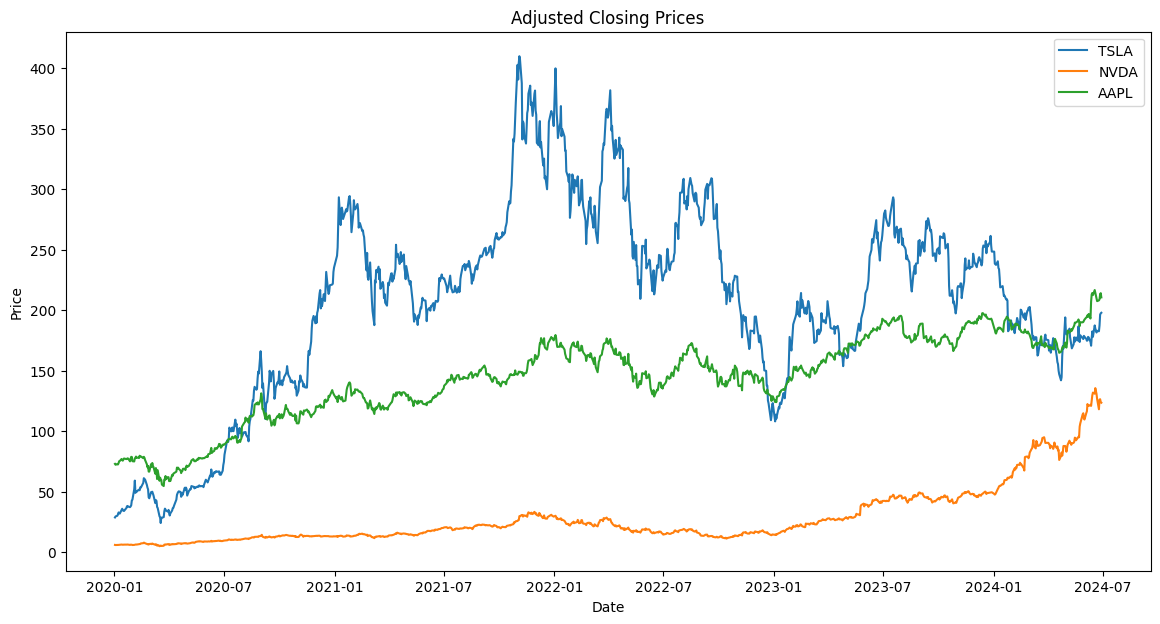

In [ ]:
# Let’s visualize the adjusted closing prices of the selected stocks.
plt.figure(figsize=(14, 7))
for ticker in tickers:
  plt.plot(data[ticker], label=ticker)
  plt.title('Adjusted Closing Prices')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()

In [ ]:
# Calculating Daily Returns
# To model volatility, we need to calculate the daily returns of the stocks. Daily returns are the percentage
# change in the adjusted closing prices.
returns = data.pct_change().dropna()
returns.head()

Ticker,AAPL,NVDA,TSLA
Date,,,
2020-01-03,-0.009722,-0.016006,0.029633
2020-01-06,0.007969,0.004194,0.019255
2020-01-07,-0.004703,0.012107,0.038801
2020-01-08,0.016086,0.001876,0.049205
2020-01-09,0.021240,0.010982,-0.021945


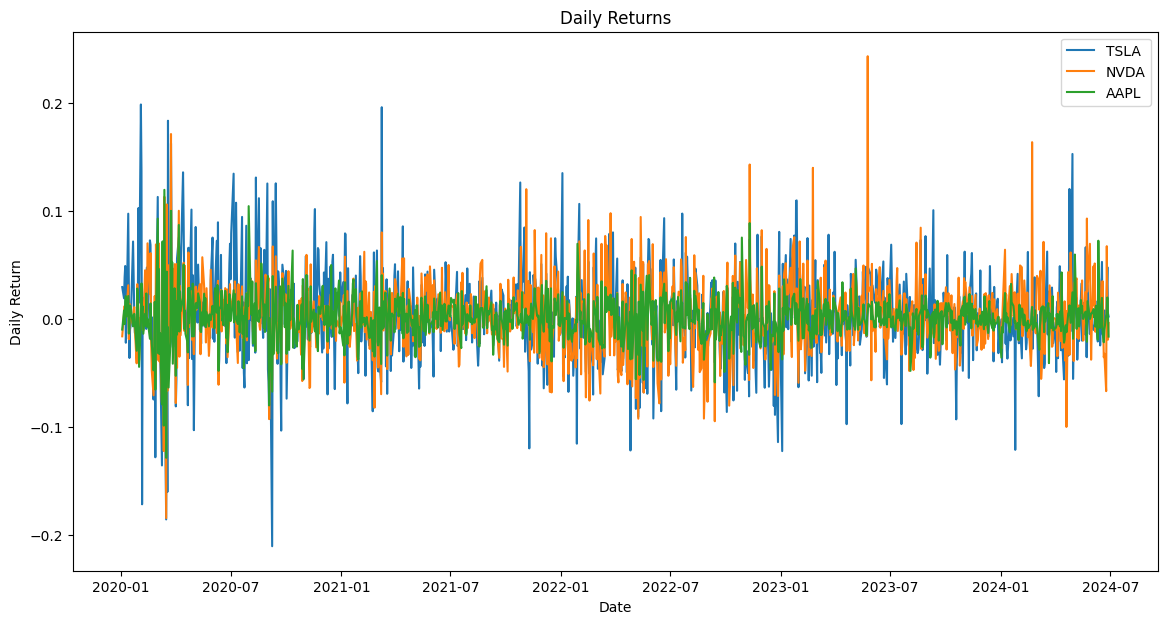

In [ ]:
# Visualizing Daily Returns
# Let’s visualize the daily returns of the selected stocks.
plt.figure(figsize=(14, 7))
for ticker in tickers:
  plt.plot(returns[ticker], label=ticker)
  plt.title('Daily Returns')
  plt.xlabel('Date')
  plt.ylabel('Daily Return')
  plt.legend()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001759. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


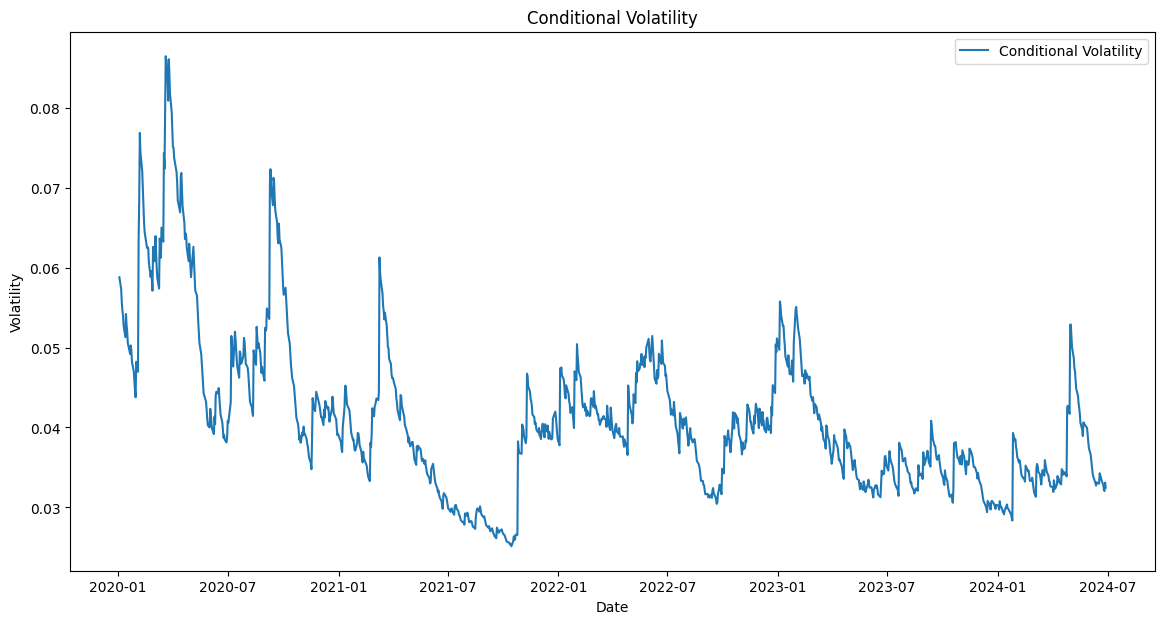

In [ ]:
# Now, let's implement the GARCH model to forecast volatility using the arch library.
# We will encapsulate the functionality within a class named GARCHModel.

class GARCHModel:
    def __init__(self, returns):
        self.returns = returns
        self.model = None
        self.results = None

    def fit_model(self):
        self.model = arch_model(self.returns, vol='Garch', p=1, q=1)
        self.results = self.model.fit(disp='off')

    def plot_volatility(self):
        plt.figure(figsize=(14, 7))
        plt.plot(self.results.conditional_volatility, label='Conditional Volatility')
        plt.title('Conditional Volatility')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.legend()
        plt.show()

    def forecast_volatility(self, horizon=5):
        forecasts = self.results.forecast(horizon=horizon)
        return forecasts.variance[-1:]

# Example usage
garch_model_tsla = GARCHModel(returns['TSLA'])
garch_model_tsla.fit_model()
garch_model_tsla.plot_volatility()

In [ ]:
# Let’s forecast the volatility for the next 10 days for each stock

forecast_horizon = 10
for ticker in tickers:
  garch_model = GARCHModel(returns[ticker])
  garch_model.fit_model()
  forecast = garch_model.forecast_volatility(horizon=forecast_horizon)
  print(f"Forecasted Volatility for {ticker} for the next {forecast_horizon} days:")
  print(forecast)

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001759. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001159. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Forecasted Volatility for TSLA for the next 10 days:
                h.01      h.02      h.03     h.04      h.05      h.06  \
Date                                                                    
2024-06-28  0.001016  0.001031  0.001045  0.00106  0.001074  0.001087   

                h.07      h.08      h.09     h.10  
Date                                               
2024-06-28  0.001101  0.001114  0.001127  0.00114  
Forecasted Volatility for NVDA for the next 10 days:
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-06-28  0.001217  0.001215  0.001214  0.001212  0.001211  0.001209   

                h.07      h.08      h.09      h.10  
Date                                                
2024-06-28  0.001208  0.001207  0.001206  0.001205  
Forecasted Volatility for AAPL for the next 10 days:
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date     

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001759. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001159. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

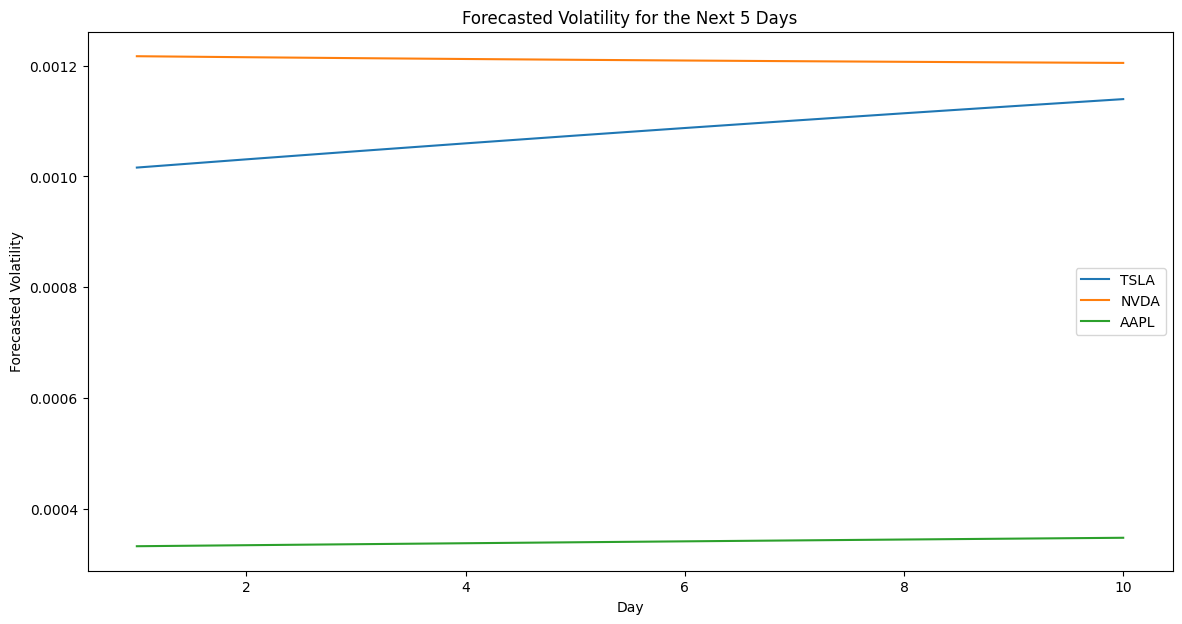

In [ ]:
forecasted_volatility = {}

for ticker in tickers:
    garch_model = GARCHModel(returns[ticker])
    garch_model.fit_model()
    forecast = garch_model.forecast_volatility(horizon=forecast_horizon)
    forecasted_volatility[ticker] = forecast.values.flatten()

forecast_df = pd.DataFrame(forecasted_volatility, index=range(1, forecast_horizon + 1))

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(forecast_df[ticker], label=ticker)

plt.title('Forecasted Volatility for the Next 5 Days')
plt.xlabel('Day')
plt.ylabel('Forecasted Volatility')
plt.legend()
plt.show()